# Neural Network with Continuous Bag of Words (CBOW)

For details see: https://www.kaggle.com/code/alincijov/nlp-starter-continuous-bag-of-words-cbow

## Libraries and settings

In [3]:
# Libraries
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Current working directory
print('Current working directory:', os.getcwd())


Current working directory: /Users/loic/Documents/data_analytics/Week_11/Grossklasse


## Data

### Sentence

Source: https://en.wikipedia.org/wiki/Currywurst

In [4]:
# Open file in read mode ('r')
with open('text.txt', 'r') as file:

    # Read the contents of the file
    sentences = file.read()

# Print the file content
print(sentences)

According to widespread belief, the Currywurst originated in Berlin in the post-World War II era. The restaurateur Herta Heuwer, who operated a snack stand at the corner of Kant and Kaiser-Friedrich Streets in the Charlottenburg district of Berlin since the summer of 1949, claimed to have invented the typical Currywurst sauce on September 4, 1949. She served it with grilled sausage, thus claiming to have invented the Currywurst. She later adorned her business with slogans like '1st Currywurst Grill in the World' and 'A Berlin specialty invented by us' and registered the word-image trademark 'Chillup' for her sauce in 1959 – a combination of chili and ketchup, recorded on January 21, 1959, based on the application from February 21, 1958, under the number 721319 as a trademark for 'Special Sauce' in the German Patent Office's register. Heuwer incorrectly referred to it as a 'patent.' The company Kraft (→ Mondelēz) reportedly, according to Heuwer, unsuccessfully sought her recipe and trad

### Wordcloud

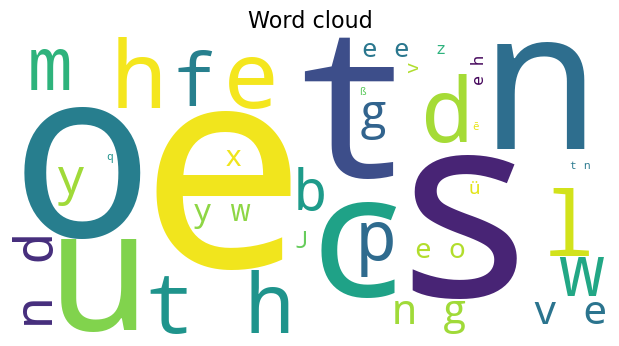

In [5]:
# Function to create a word cloud
def wordCloud_generator(data, title=None):
    
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='white',
                          min_font_size = 8
                         ).generate(" ".join(data))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(sentences, title="Word cloud")

### Clean Data

In [6]:
# Remove special characters
sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)

# Remove 1 letter words
sentences = re.sub(r'(?:^| )\w(?:$| )', ' ', sentences).strip()

# Lower all characters
sentences = sentences.lower()

## Vocabulary

In [7]:
# Split sentense to derive vocabulary (tokens)
words = sentences.split()
vocab = set(words)

vocab_size = len(vocab)
embed_dim = 10
context_size = 2

print(vocab)

{'or', 'entirely', 'after', 'great', 'this', 'seasoning', 'plausible', 'according', 'final', 'from', 'some', '2003', 'mondel', 'end', 'day', 'spandauer', 'they', 'because', 'attributed', 'became', 'us', '1958', 'individual', 'streets', 'ckner', 'without', '1959', 'followed', 'stand', 'heavily', 'german', 'as', 'register', 'mixture', 'its', 'frank', 'together', 'max', 'manufacturing', 'several', 'customer', 'throughout', 'inventor', 'herself', 'free', 'prevailed', 'skin', 'example', 'insisted', 'served', 'location', 'charge', 'still', 'claiming', 'were', 'scarce', 'between', 'shape', 'era', 'made', 'do', 'joined', 'february', 'taste', 'sausage', '2018', 'developed', 'until', 'he', 'are', 'january', 'junior', 'unsuccessfully', 'under', 'war', 'representations', 'emphasizes', 'other', 'snack', 'built', 'making', 'specialty', 'exists', 'image', 'an', 'claim', '29', 'based', 'give', 'spice', '721319', 'have', 'johanngeorgenstadt', 'on', 'process', 'with', 'company', 'production', 'whereas',

## Implementation

### Dictionaries

In [8]:
# Bag-of-Words
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

print(word_to_ix)

{'or': 0, 'entirely': 1, 'after': 2, 'great': 3, 'this': 4, 'seasoning': 5, 'plausible': 6, 'according': 7, 'final': 8, 'from': 9, 'some': 10, '2003': 11, 'mondel': 12, 'end': 13, 'day': 14, 'spandauer': 15, 'they': 16, 'because': 17, 'attributed': 18, 'became': 19, 'us': 20, '1958': 21, 'individual': 22, 'streets': 23, 'ckner': 24, 'without': 25, '1959': 26, 'followed': 27, 'stand': 28, 'heavily': 29, 'german': 30, 'as': 31, 'register': 32, 'mixture': 33, 'its': 34, 'frank': 35, 'together': 36, 'max': 37, 'manufacturing': 38, 'several': 39, 'customer': 40, 'throughout': 41, 'inventor': 42, 'herself': 43, 'free': 44, 'prevailed': 45, 'skin': 46, 'example': 47, 'insisted': 48, 'served': 49, 'location': 50, 'charge': 51, 'still': 52, 'claiming': 53, 'were': 54, 'scarce': 55, 'between': 56, 'shape': 57, 'era': 58, 'made': 59, 'do': 60, 'joined': 61, 'february': 62, 'taste': 63, 'sausage': 64, '2018': 65, 'developed': 66, 'until': 67, 'he': 68, 'are': 69, 'january': 70, 'junior': 71, 'unsu

### Data bags

In [9]:
# Create data bags with ([context], target) as the basis for modeling
data = []

for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))

# Show first entries in 'data'
data[:20]

[(['according', 'to', 'belief', 'the'], 'widespread'),
 (['to', 'widespread', 'the', 'currywurst'], 'belief'),
 (['widespread', 'belief', 'currywurst', 'originated'], 'the'),
 (['belief', 'the', 'originated', 'in'], 'currywurst'),
 (['the', 'currywurst', 'in', 'berlin'], 'originated'),
 (['currywurst', 'originated', 'berlin', 'in'], 'in'),
 (['originated', 'in', 'in', 'the'], 'berlin'),
 (['in', 'berlin', 'the', 'post'], 'in'),
 (['berlin', 'in', 'post', 'world'], 'the'),
 (['in', 'the', 'world', 'war'], 'post'),
 (['the', 'post', 'war', 'ii'], 'world'),
 (['post', 'world', 'ii', 'era'], 'war'),
 (['world', 'war', 'era', 'the'], 'ii'),
 (['war', 'ii', 'the', 'restaurateur'], 'era'),
 (['ii', 'era', 'restaurateur', 'herta'], 'the'),
 (['era', 'the', 'herta', 'heuwer'], 'restaurateur'),
 (['the', 'restaurateur', 'heuwer', 'who'], 'herta'),
 (['restaurateur', 'herta', 'who', 'operated'], 'heuwer'),
 (['herta', 'heuwer', 'operated', 'snack'], 'who'),
 (['heuwer', 'who', 'snack', 'stand'], 

### Word embeddings

In [10]:
# Create word embeddings
np.random.seed(42)
embeddings = np.random.random_sample((vocab_size, embed_dim))

# Show first embeddings
print(embeddings[0:5])

# Dimensions of np.ndarray
print('\nDimensions of np.ndarray:', embeddings.ndim)

[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
  0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998 0.78517596
  0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
  0.30461377 0.09767211 0.68423303 0.44015249]
 [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
  0.31171108 0.52006802 0.54671028 0.18485446]]

Dimensions of np.ndarray: 2


### Linear Model

In [11]:
# Function to perform linear transformation of word embeddings
def linear(m, theta):
    w = theta

    return m.dot(w)

### Log softmax + NLLLoss = Cross Entropy

In [12]:
# Loss function to measure the model performance during training
def log_softmax(x):
    e_x = np.exp(x - np.max(x))

    return np.log(e_x / e_x.sum())

def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]

    return -out.sum()/len(out)

def log_softmax_crossentropy_with_logits(logits,target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- out + softmax) / logits.shape[0]

### Forward function

In [13]:
# Function to provide a forward pass through a neural network
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    
    return m, n, o

### Backward function

In [14]:
# Function to provide a backward pass through a neural network
def backward(preds, theta, target_idxs):
    m, n, o = preds
    
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    
    return dw

### Optimize function

In [15]:
# Function for parameter (theta) optimization
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr

    return theta

## Training

In [16]:
# Training the neural network
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

epoch_losses = {}

for epoch in range(100):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
    
    epoch_losses[epoch] = losses
    

## Analyze

### Plot loss/epoch

Text(0, 0.5, 'Losses')

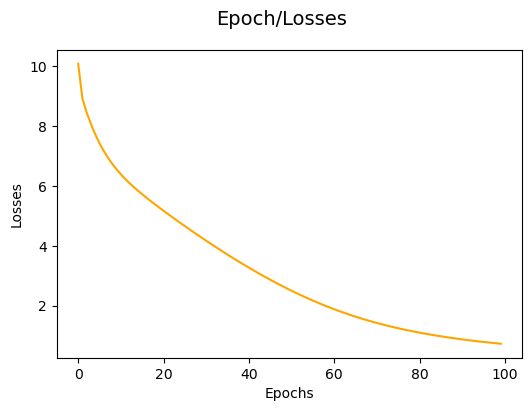

In [17]:
# Analyzing the neural network
ix = np.arange(0,100)

fig = plt.figure(figsize=(6,4))
fig.suptitle('Epoch/Losses', fontsize=14)
plt.plot(ix,[epoch_losses[i][0] for i in ix], c='orange')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Losses', fontsize=10)

### Predict next word

In [18]:
# Function to predict the target word
def predict(words):
    
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]
    
    return word

# Predict next word based on input words
predict(['according', 'to', 'belief', 'the'])

'widespread'

### Predict all targets of all data bags and show accuracy

In [19]:
# Calculate accuracy
def accuracy():
    wrong = 0
    for context, target in data:
        if(predict(context) != target):
            wrong += 1
            
    return (1 - (wrong / len(data)))

print(f'{accuracy():.4f}')

0.8462


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [20]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.1.0
Datetime: 2023-11-27 13:03:17
Python Version: 3.9.13
-----------------------------------
